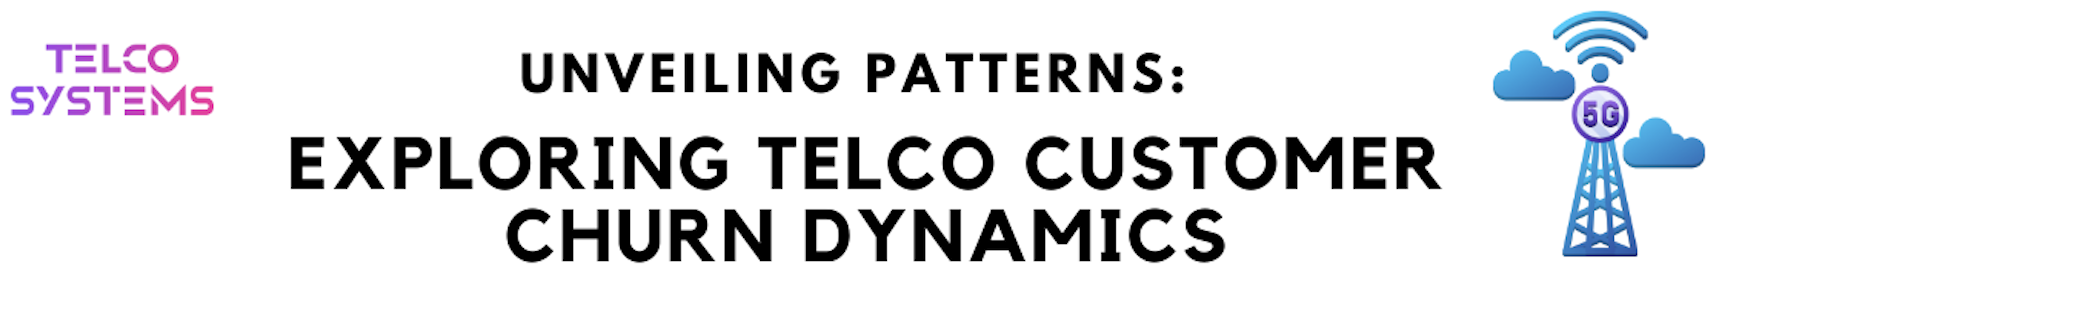

# Table of Contents

1. [Project Overview](#introduction)
2. [Project Goal](#project_goal)
3. [Data Acquisition](#acquisition)
4. [Data Preparation](#preparation)
5. [Data Exploration](#exploration)
6. [Preprocessing for Modeling](#preprocessing)
7. [Modeling](#modeling)
8. [Model Testing](#testing)
9. [Conclusion](#conclusion)

# 1. Project Overview <a name="introduction"></a>



According to TechSee's report based on a 2019 survey result,39% of Americans canceled their telecom contracts due to unsatisfied customer service (TechSee Augmented Vision Ltd., 2022).

Reactive retention strategies are shown to be ineffective, instead, proactive efforts are key. Among those who churned following a negative service experience, 40% would have changed their mind if they had been offered a better service plan, and 33% would have stayed if they had believed that the telco’s service would improve in the future (TechSee Augmented Vision Ltd., 2022).

 # 2. Project Goal <a name="project_goal"></a>

This research will explore the main drivers for customers' churning at Telco, a tele-comm service provider. The goal for this project is to develop a ML classification model in order to predict the churning pattern of a customer, and therefore implementing proactive measures to prevent the churning before it happens.

# 3. Data Acquisition <a name="acquisition"></a>

- Data source is non-public; acquired from MySQL Codeup DB Server(Telco_churn Database) with credentials that are stored in env.py

- The whole "Telco_churn" Database has 10 tables, 106 columns (including duplicated columns)

- Used MySQL command (shown cell below) to join all the tables together and exported as "telco_raw.csv"

- Used Excel to delete all the duplicated columns

- The final raw dataset has 7043 rows and 25 non-duplicated columns

In [1]:
# My SQL code for joining all the tables in Telco_churn Database:
'''
use telco_churn;
SELECT *
FROM customers
LEFT JOIN contract_types ON customers.contract_type_id = contract_types.contract_type_id
LEFT JOIN customer_churn ON customers.customer_id = customer_churn.customer_id
LEFT JOIN customer_contracts ON customers.customer_id = customer_contracts.customer_id
LEFT JOIN customer_details ON customers.customer_id = customer_details.customer_id
LEFT JOIN customer_payments ON customers.customer_id = customer_payments.customer_id
LEFT JOIN customer_signups ON customers.customer_id = customer_signups.customer_id
LEFT JOIN customer_subscriptions ON customers.customer_id = customer_subscriptions.customer_id
LEFT JOIN internet_service_types ON customer_subscriptions.internet_service_type_id = internet_service_types.internet_service_type_id
LEFT JOIN payment_types ON customers.payment_type_id = payment_types.payment_type_id;

'''

'\nuse telco_churn;\nSELECT *\nFROM customers\nLEFT JOIN contract_types ON customers.contract_type_id = contract_types.contract_type_id\nLEFT JOIN customer_churn ON customers.customer_id = customer_churn.customer_id\nLEFT JOIN customer_contracts ON customers.customer_id = customer_contracts.customer_id\nLEFT JOIN customer_details ON customers.customer_id = customer_details.customer_id\nLEFT JOIN customer_payments ON customers.customer_id = customer_payments.customer_id\nLEFT JOIN customer_signups ON customers.customer_id = customer_signups.customer_id\nLEFT JOIN customer_subscriptions ON customers.customer_id = customer_subscriptions.customer_id\nLEFT JOIN internet_service_types ON customer_subscriptions.internet_service_type_id = internet_service_types.internet_service_type_id\nLEFT JOIN payment_types ON customers.payment_type_id = payment_types.payment_type_id;\n\n'

In [122]:
import acquire as a # acquire.py is a file that stores a function "get_telco_data" to retrieve data from my local .csv file if it exists;
                    #if this file does not exist locally,it will run a pd.read_sql() function to retreive data from MySQL database

telco = a.get_telco_data() # In this case, there is a local telco_raw.csv file in my working directory, so it retrieves locally.             

this file exists, reading from csv


In [123]:
telco.info()
telco.columns

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   partner                   7043 non-null   object 
 3   dependents                7043 non-null   object 
 4   tenure                    7043 non-null   int64  
 5   phone_service             7043 non-null   object 
 6   multiple_lines            7043 non-null   object 
 7   internet_service_type_id  7043 non-null   int64  
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'churn_month', 'signup_date',
       'internet_service_type', 'payment_type'],
      dtype='object')

# 4. Data Preparation <a name="preparation"></a>

- Identify and replace NaNs in the dataset.
- Checked for nulls in the data (there were none)
- Checked column data types and convert to the proper type (total_charges column from object to float)
- Clean up columns and remove duplciates


> # 4.1 Identify NaN values and interpret them

- For NaNs in "internet_service_type" column, it means "No internet service",and therefore were replaced as such.

- For NaNs in "churn_month", it means "Not_churned", and were replaced as such.

In [124]:
telco_na = telco.isna().sum()
telco_na[telco_na > 0]

churn_month              5174
internet_service_type    1526
dtype: int64

In [125]:
# interpret the NaNs in internet_service_type column

print(telco.internet_service_type.value_counts(dropna=False)) 
print()
print(telco.internet_service_type_id.value_counts(dropna=False))
print()
print(telco.online_security.value_counts(dropna=False))
print()
print(telco.online_backup.value_counts(dropna=False))
print()
print(telco.device_protection.value_counts(dropna=False))
print()
print(telco.tech_support.value_counts(dropna=False))
print()
print(telco.streaming_tv.value_counts(dropna=False))
print()
print(telco.streaming_movies.value_counts(dropna=False))


internet_service_type
Fiber optic    3096
DSL            2421
NaN            1526
Name: count, dtype: int64

internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64

online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


In [126]:
# interpret the NaNs in churn_month column

print(telco.churn_month.value_counts(dropna=False)) 
print()
print(telco.churn.value_counts(dropna=False))
print()

churn_month
NaN        5174
1/31/22    1869
Name: count, dtype: int64

churn
No     5174
Yes    1869
Name: count, dtype: int64



In [127]:
# replace NaNs with corresponding names in internet_service_type

telco['internet_service_type']=telco['internet_service_type'].fillna('No internet service')
telco['internet_service_type'].value_counts()

internet_service_type
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: count, dtype: int64

In [128]:
# replace NaNs with corresponding names in churn_month
telco['churn_month']=telco['churn_month'].fillna('not churned')
telco['churn_month'].value_counts()

churn_month
not churned    5174
1/31/22        1869
Name: count, dtype: int64

> # 4.2 Check for null values

In [129]:
telco.isnull().sum()

gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
churn_month                 0
signup_date                 0
internet_service_type       0
payment_type                0
dtype: int64

> # 4.3 Check data types

In [130]:
print(telco.head())
print()
telco.dtypes

             gender  senior_citizen partner dependents  tenure phone_service  \
customer_id                                                                    
0002-ORFBO   Female               0     Yes        Yes       9           Yes   
0003-MKNFE     Male               0      No         No       9           Yes   
0004-TLHLJ     Male               0      No         No       4           Yes   
0011-IGKFF     Male               1     Yes         No      13           Yes   
0013-EXCHZ   Female               1     Yes         No       3           Yes   

            multiple_lines  internet_service_type_id online_security  \
customer_id                                                            
0002-ORFBO              No                         1              No   
0003-MKNFE             Yes                         1              No   
0004-TLHLJ              No                         2              No   
0011-IGKFF              No                         2              No   
0013-EX

gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
churn_month                  object
signup_date                  object
internet_service_type        object
payment_type                 object
dtype: object

In [131]:
#total_charges column is not supposed to be an object
telco['total_charges'].value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [132]:
# interpret the '' in total_charges column
print(telco.tenure.value_counts().sort_values())
print()
print(telco.total_charges.value_counts())

tenure
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 73, dtype: int64

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64


In [133]:
# replace '' in total_charges column with 0
# convert total_charges from object to float

telco.total_charges = telco.total_charges.replace(' ','0.0')
telco.total_charges = telco.total_charges.astype(float)

In [134]:
telco.dtypes

gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
contract_type                object
churn_month                  object
signup_date                  object
internet_service_type        object
payment_type                 object
dtype: object

> # 4.4 Clean up columns
- remove duplicates

In [135]:
telco=telco.drop(['payment_type_id'],axis =1)
telco=telco.drop(['contract_type_id'],axis =1)
telco=telco.drop(['internet_service_type_id'],axis =1)
# Drop unnecessary columns
telco = telco.drop(['churn_month','signup_date'], axis=1)

In [136]:
len(telco.columns)

20

> # 4.5 Split the dataset to train, validate and and test

In [137]:
from sklearn.model_selection import train_test_split
#first split
train, validate_test = train_test_split(telco, 
                train_size=0.60, #size of the train df, and the test size will default to 1-train_size
                random_state=123, #set any number here for consistency
                 stratify=telco['churn'] #need to stratify on target variable
                )
    
#second split
validate, test = train_test_split(validate_test, #this is the df that we are splitting now
                test_size=0.50, #set test or train size to 50%
                 random_state=123, #gotta send in a random seed
                stratify=validate_test['churn']#still got to stratify
                )
    

In [138]:
len(train.columns)

20

# 5. Data Exploration <a name="exploration"></a>

> # 5.1 Churn vs. Not churn datasets

>>### Question 1: How many customers have churned?

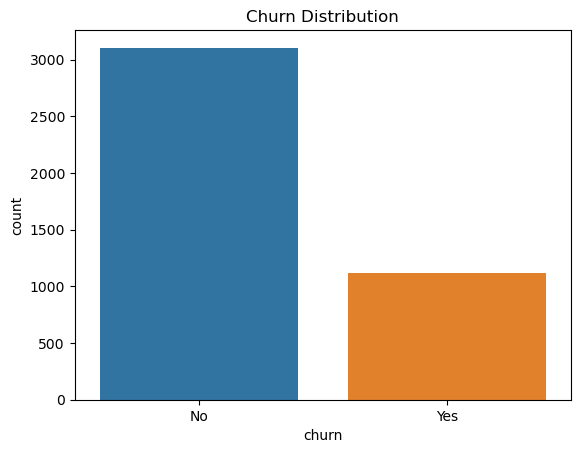

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='churn', data=train)
plt.title('Churn Distribution')
plt.show()

In [140]:
# split train dataset by churn/ not churn
churn = train[train.churn == 'Yes']
notchurn = train[train.churn != 'Yes']
len(churn) + len(notchurn) == len(train)

True

> # 5.1.1 Continuous variables explorations

>### Question  2: How do monthly charges, total charges and tenure affect churn?
>>- Customers that have churned tend to have higher monthly charges, lower tenure and lower total charges;
>> - Tenure seems to have a stronger impact on churn status than monthly charges
>> - Total charges do not seem to directly relate to churn status,as it is a result of monthly charges and tenure's multiplication. Be careful with the spurious correlation.

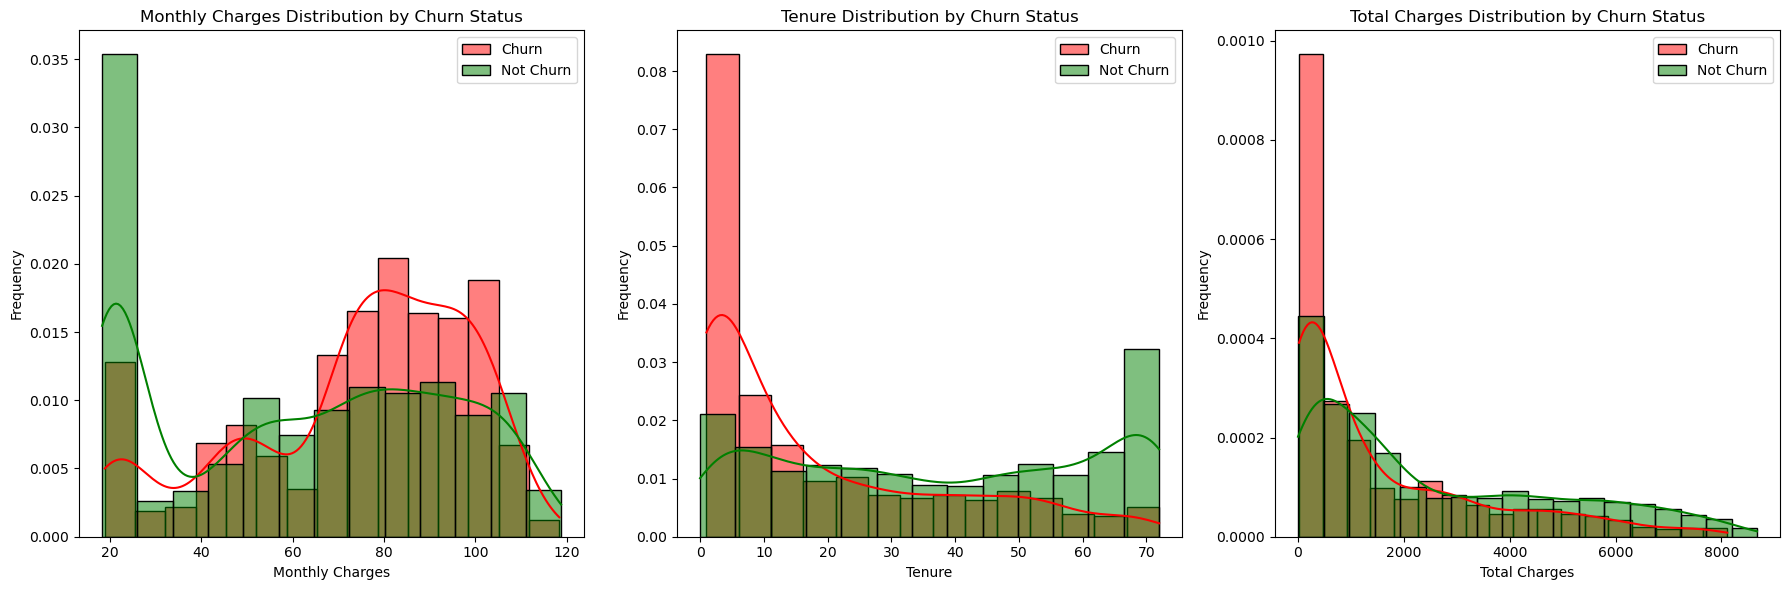

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'churn' and 'notchurn' are your DataFrames

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Monthly Charges
sns.histplot(churn['monthly_charges'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[0])
sns.histplot(notchurn['monthly_charges'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[0])
axes[0].set_title('Monthly Charges Distribution by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot Tenure
sns.histplot(churn['tenure'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[1])
sns.histplot(notchurn['tenure'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[1])
axes[1].set_title('Tenure Distribution by Churn Status')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot Total Charges
sns.histplot(churn['total_charges'], label='Churn', kde=True, color='red', alpha=0.5, stat='density', ax=axes[2])
sns.histplot(notchurn['total_charges'], label='Not Churn', kde=True, color='green', alpha=0.5, stat='density', ax=axes[2])
axes[2].set_title('Total Charges Distribution by Churn Status')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Frequency')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


> ## T-Test on 'monthly_charges' and 'tenure' vs. 'churn' / 'not churn'

In [142]:
from scipy import stats


In [143]:
# monthly charges on churn vs. monthly charges on not churn #

# 2-sample 1-tail T-test
Ho = 'monthly charges for churned customers are not higher than non-churned customers'
Ha = 'monthly charges for churned customers are higher than non-churned customers'
alpha = 0.05

# Test for normal distribution, since both datasets have more than 500 samples, they pass normality test
print(len(churn)>500)
print(len(notchurn)>500)

# Test for equal variances. Since the 2 datasets do not pass equal variance test, will use equal_var = False argument
print(churn.monthly_charges.var() == notchurn.monthly_charges.var())

# Test for independence: both datasets are independent from each other, as no observations in the churn sample exist in the not churn sample

# independent t-test
t, p = stats.ttest_ind(churn.monthly_charges, notchurn.monthly_charges, equal_var=False)
t, p

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print(f'We reject the null hypothesis, with pvalue={p}, we conclude {Ha}')


True
True
False
We reject the null hypothesis, with pvalue=3.902002806769788e-41, we conclude monthly charges for churned customers are higher than non-churned customers


In [144]:
# tenure on churn vs. tenure on not churn #

# 2-sample 1-tail T-test
Ho = 'tenure for churned customers are not lower than non-churned customers'
Ha = 'tenure for churned customers are lower than non-churned customers'
alpha = 0.05

# Test for normal distribution, since both datasets have more than 500 samples, they pass normality test
print(len(churn)>500)
print(len(notchurn)>500)

# Test for equal variances. Since the 2 datasets do not pass equal variance test, will use equal_var = False argument
print(churn.tenure.var() == notchurn.tenure.var())

# Test for independence: both datasets are independent from each other, as no observations in the churn sample exist in the not churn sample

# independent t-test
t, p = stats.ttest_ind(notchurn.tenure,churn.tenure,equal_var=False)
print(t, p)

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print(f'We reject the null hypothesis, with pvalue={p}, we conclude {Ha}')


True
True
False
26.79629948967026 1.3308231278358085e-138
We reject the null hypothesis, with pvalue=1.3308231278358085e-138, we conclude tenure for churned customers are lower than non-churned customers


> # 5.1.2 Categorical variables exploration
>># Question 3: How are the categorical variables affect churn?
>>> - For customers that do have internet service, the ones that choose fiber optics tend to churn,the ones that have no internet service are least likely to churn.
>>> - Among all support options (online security, online backup, device protection, tech support), customers that opt No to support are most likely tend to churn, customers that have no internet service are least likely tp churn
>>> - Customers that have month-to-month contract are most likely to churn, customers sign 2-year contract are least likely to churn
>>> - Customers choose paperless biling are more likely to churn
>>> - customers choose electric check are most likely to churn.

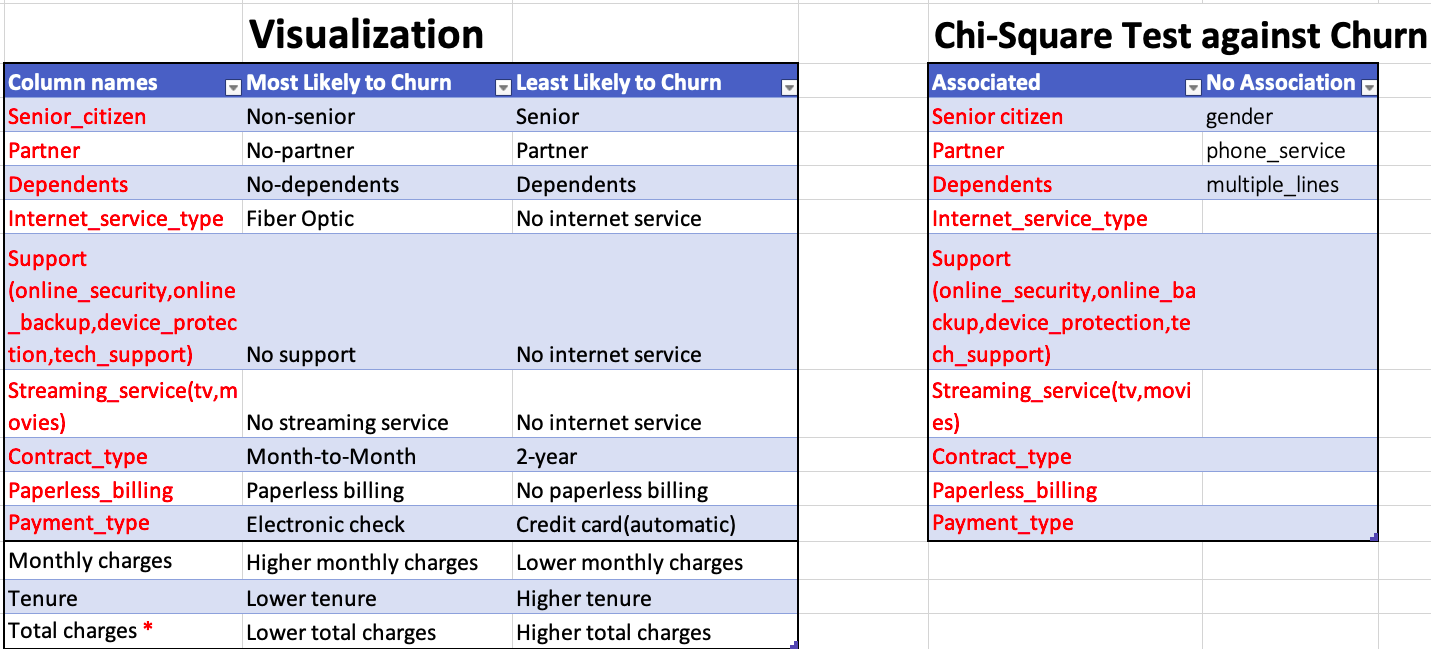

- '*' 'total_charges' seems to have a spurious correlation with churn status

In [145]:
train.columns
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 4083-BFNYK to 7562-UXTPG
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4225 non-null   object 
 1   senior_citizen         4225 non-null   int64  
 2   partner                4225 non-null   object 
 3   dependents             4225 non-null   object 
 4   tenure                 4225 non-null   int64  
 5   phone_service          4225 non-null   object 
 6   multiple_lines         4225 non-null   object 
 7   online_security        4225 non-null   object 
 8   online_backup          4225 non-null   object 
 9   device_protection      4225 non-null   object 
 10  tech_support           4225 non-null   object 
 11  streaming_tv           4225 non-null   object 
 12  streaming_movies       4225 non-null   object 
 13  paperless_billing      4225 non-null   object 
 14  monthly_charges        4225 non-null   float64

In [146]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [147]:
categorical_columns = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn',
       'contract_type', 'internet_service_type',
       'payment_type']
print(len(categorical_columns))



17


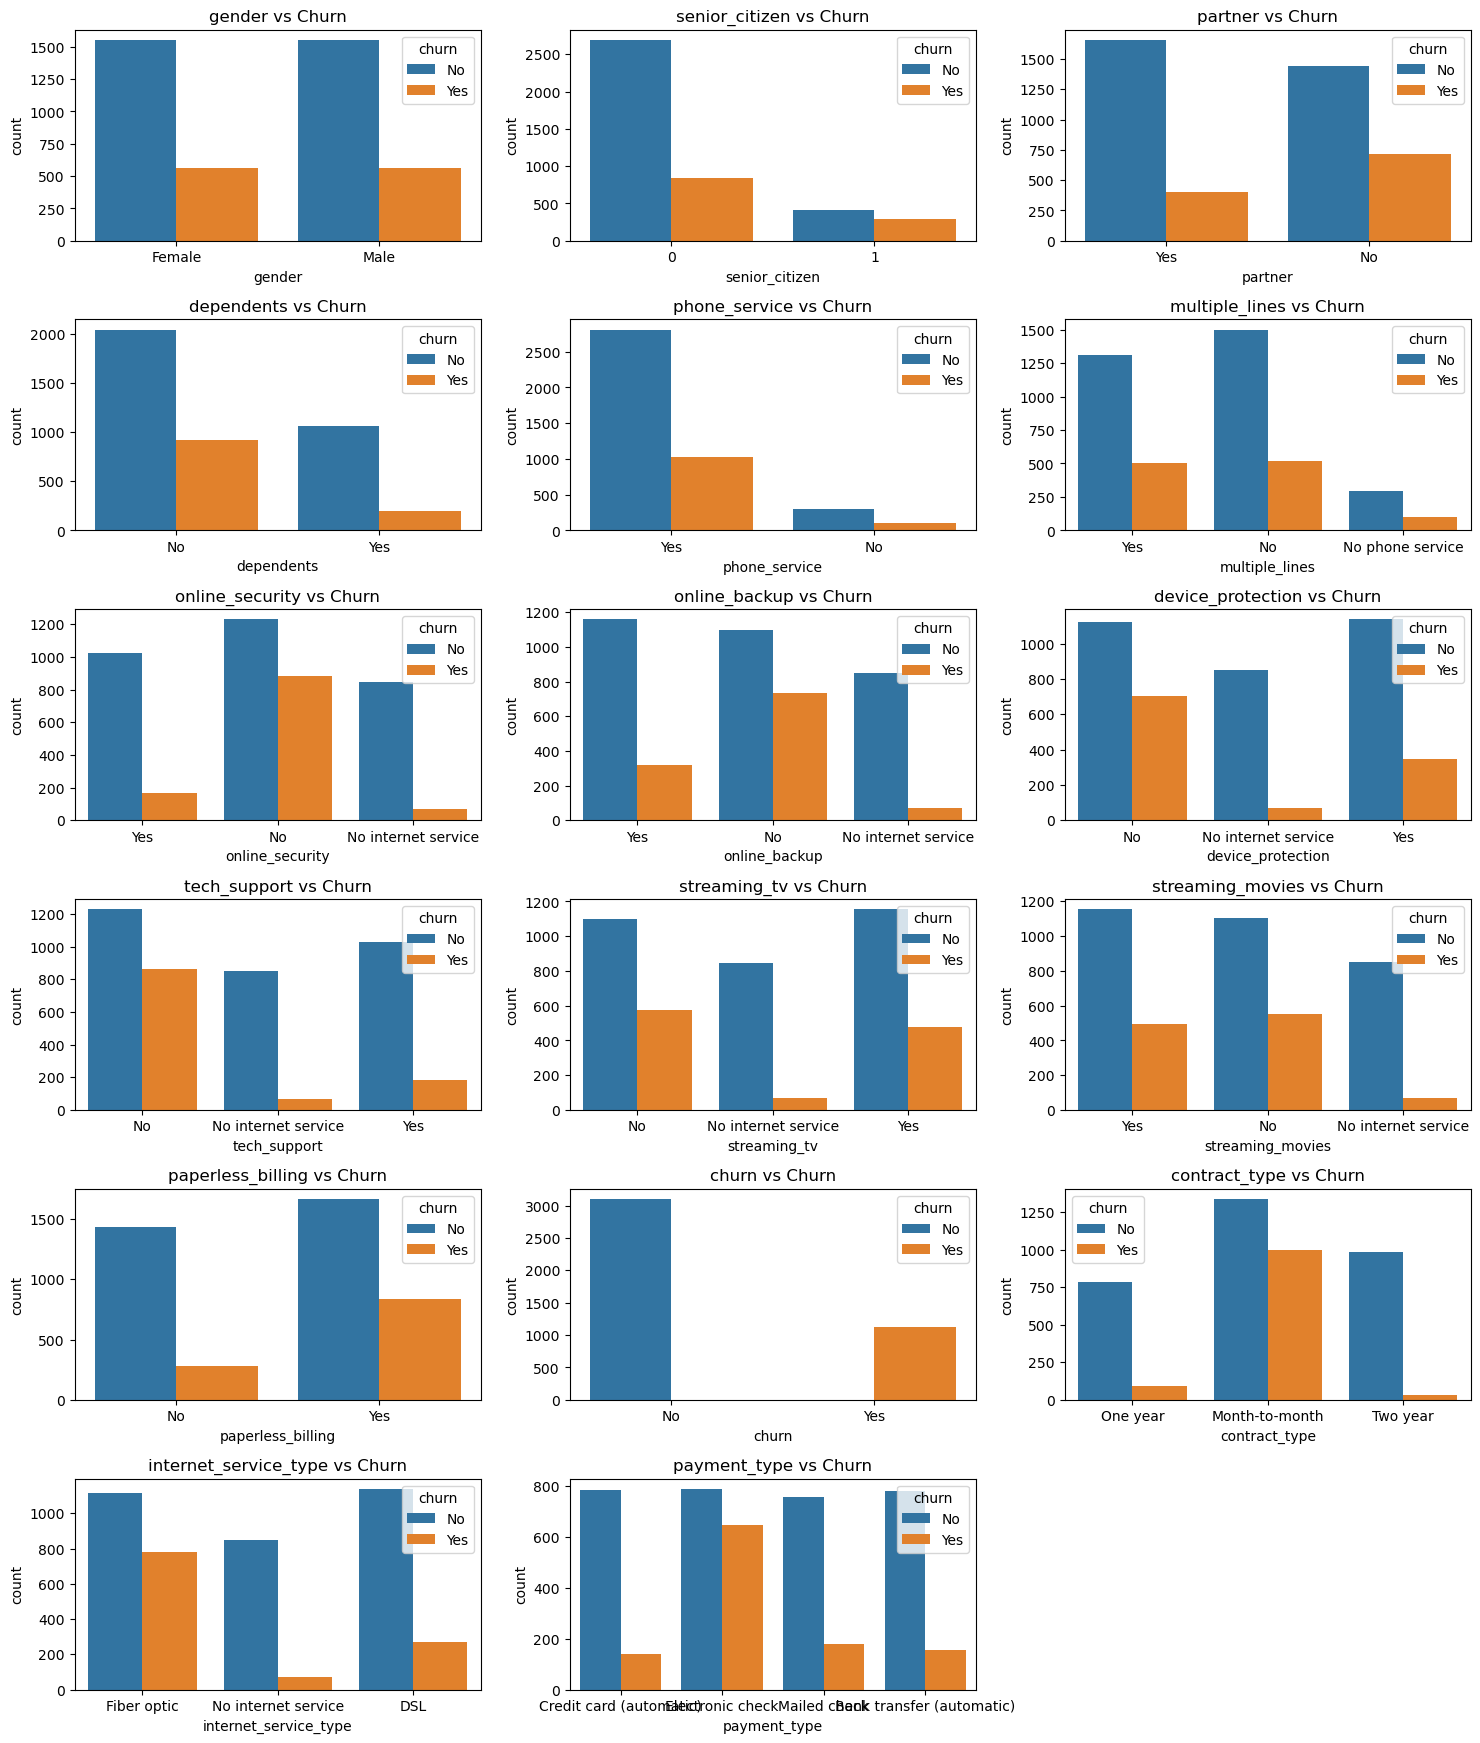

In [148]:
import warnings
warnings.filterwarnings("ignore")
# fig means entire figure, axes is the array of subplots
fig, axes = plt.subplots(nrows=7, ncols=3, 
                         figsize=(15,20))

# Flatten the axes array
axes = axes.flatten()

# Plot each categorical column against churn
# i represents index, column represents columns
# enumerate in order to generate titles
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='churn', data=train, ax=axes[i])
    axes[i].set_title(f'{column} vs Churn')

# Remove empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [149]:
from scipy.stats import chi2_contingency
import pandas as pd
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train['churn'])

    # Perform chi-square test
    chi2, p,degf, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {column} against churn:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, "and churn.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between", column, "and churn.")

    print("\n" + "="*50 + "\n")

Chi-square test for gender against churn:
Chi2 statistic: 2.4733283637992e-05
P-value: 0.996031931504371
Fail to reject the null hypothesis. There is not enough evidence of association between gender and churn.


Chi-square test for senior_citizen against churn:
Chi2 statistic: 90.8791641507161
P-value: 1.5271938515844278e-21
Reject the null hypothesis. There is evidence of association between senior_citizen and churn.


Chi-square test for partner against churn:
Chi2 statistic: 97.15376877725984
P-value: 6.414706667955165e-23
Reject the null hypothesis. There is evidence of association between partner and churn.


Chi-square test for dependents against churn:
Chi2 statistic: 102.24217978518547
P-value: 4.91325418673439e-24
Reject the null hypothesis. There is evidence of association between dependents and churn.


Chi-square test for phone_service against churn:
Chi2 statistic: 0.36450167846667736
P-value: 0.5460166860258362
Fail to reject the null hypothesis. There is not enough evid

> ## Question 4: Do people have higher tenure tend to have lower monthly charges?
>> - From visualization,there is not significant differences in monthly charges with different tenures.
>> - Pearson's correlation hypothesis shows that there is a weak positive correlation between the 2 variables, with a coefficient r of 0.24 and p-value of 3.29e-56

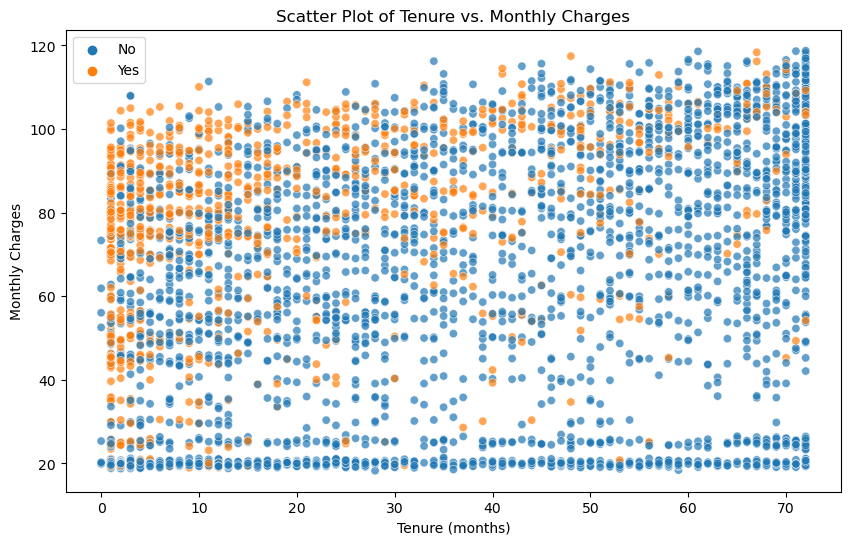

In [150]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='monthly_charges', data=train, hue='churn', alpha=0.7)
plt.title('Scatter Plot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend()
plt.show()


In [151]:
# Define hypothesis
Ho = 'there is no correlation between tenure and monthly charges'
Ha = 'there is a correlation between tenure and monthly charges'
alpha = 0.05

#Pearson's correlation test
r,p = stats.pearsonr(train.tenure,train.monthly_charges)

if p < alpha:
    print(f'We reject the null hypothesis,{Ha}, with correlation coefficient of {r} and pvalue = {p}')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis,there is a correlation between tenure and monthly charges, with correlation coefficient of 0.23954758922224365 and pvalue = 3.2878472827609713e-56


# 6. Preprocessing for Modeling <a name="preprocessing"></a>

> - In this section, all columns will be encoded into numbers for the convenience of the upcoming modeling.
> - 'gender','phone_service' and 'multiple_lines' columns are dropped due to their lack of association with churn status,as proven from the previous chi-square tests.

In [152]:
# dropping irrelavant columns proven from previous chi-square tests
train = train.drop(columns = ['gender','phone_service','multiple_lines'])
validate = validate.drop(columns = ['gender','phone_service','multiple_lines'])
test = test.drop(columns = ['gender','phone_service','multiple_lines'])

In [153]:
# senior_citizen, monthly_charges, total_charges,tenure columns are not included
new_cat_col = train.select_dtypes(include='O').columns
new_cat_col

Index(['partner', 'dependents', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [154]:
import pandas as pd

#encode training dataset 
dummy_train = pd.get_dummies(train[new_cat_col], dummy_na=False, drop_first=True).astype(int)
encoded_train = pd.concat([train,dummy_train],axis=1)
encoded_train = encoded_train.drop(columns=new_cat_col)

#encode the validate dataset
dummy_val = pd.get_dummies(validate[new_cat_col], dummy_na=False, drop_first=True).astype(int)
encoded_val = pd.concat([validate,dummy_val],axis=1)
encoded_val = encoded_val.drop(columns=new_cat_col)

#encode the test dataset
#encode the validate dataset
dummy_test = pd.get_dummies(test[new_cat_col], dummy_na=False, drop_first=True).astype(int)
encoded_test = pd.concat([test,dummy_test],axis=1)
encoded_test = encoded_test.drop(columns=new_cat_col)

# 7. Modeling <a name="modeling"></a>

> ## Baseline accuracy

In [155]:
# Set baseline accuracy
encoded_train.churn_Yes.value_counts(normalize=True)

churn_Yes
0    0.734675
1    0.265325
Name: proportion, dtype: float64

In [156]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = encoded_train.drop(columns=['churn_Yes'])
y_train = encoded_train.churn_Yes

X_val = encoded_val.drop(columns=['churn_Yes'])
y_val = encoded_val.churn_Yes

X_test = encoded_test.drop(columns=['churn_Yes'])
y_test = encoded_test.churn_Yes


> ## 7.1 Decision Tree
>> ### - Models with max depth of 2 and 3 have the same accuracy results both on training and validate datasets. Model with max depth of 3 is considered to be the best model in decision tree algorithm
>> ### - According to the decision tree, tenure <= 10.5 is the most important cutoff point for determing churning status, followed by internet_service_type "Fiber optic".

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

In [73]:
# Initialize an empty list to store results
results = []

# Loop over different hyperparameter values
for depth in range(1, 21):
    # Create a decision tree model with the current hyperparameter value
    clf = DecisionTreeClassifier(max_depth=depth,random_state=123)

    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Get the accuracy score
    score_train = clf.score(X_train, y_train)
    score_val = clf.score(X_val, y_val)

    # Append the results to the list
    results.append({'Max Depth': depth, 
                    'Train_Accuracy': round(score_train, 4),
                    'Validate_Accuracy': round(score_val,4),
                   'Difference':abs(score_train - score_val) })

# Convert the list of dictionaries to a DataFrame
decision_tree_accuracy = pd.DataFrame(results)

print(decision_tree_accuracy.sort_values(by=['Difference','Validate_Accuracy'],ascending=[True,False]))


    Max Depth  Train_Accuracy  Validate_Accuracy  Difference
1           2          0.7837             0.7878    0.004124
2           3          0.7837             0.7878    0.004124
4           5          0.8024             0.7928    0.009606
0           1          0.7359             0.7253    0.010521
3           4          0.7927             0.7771    0.015516
5           6          0.8107             0.7878    0.022858
6           7          0.8263             0.7864    0.039899
7           8          0.8388             0.7871    0.051734
8           9          0.8549             0.7828    0.072087
9          10          0.8793             0.7637    0.115628
10         11          0.8956             0.7559    0.139766
11         12          0.9150             0.7459    0.169110
12         13          0.9321             0.7480    0.184023
13         14          0.9467             0.7424    0.204375
14         15          0.9605             0.7367    0.223781
15         16          0

In [45]:
best_decision_tree = decision_tree_accuracy.iloc[2,:]
best_decision_tree 

Max Depth            3.000000
Train_Accuracy       0.783700
Validate_Accuracy    0.787800
Difference           0.004124
Name: 2, dtype: float64

In [158]:
X_train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'partner_Yes', 'dependents_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic',
       'internet_service_type_No internet service',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

>> ## Decision Tree Visualization 

In [160]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)

In [173]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,partner_Yes,dependents_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No internet service,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,1,38,95.00,3591.25,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
5804-LEPIM,1,2,70.35,139.05,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4895-TMWIR,1,11,19.95,214.75,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
1342-JPNKI,0,10,86.05,834.10,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3397-AVTKU,0,43,60.00,2548.55,0,0,0,0,0,1,...,0,1,1,0,1,0,0,0,1,0


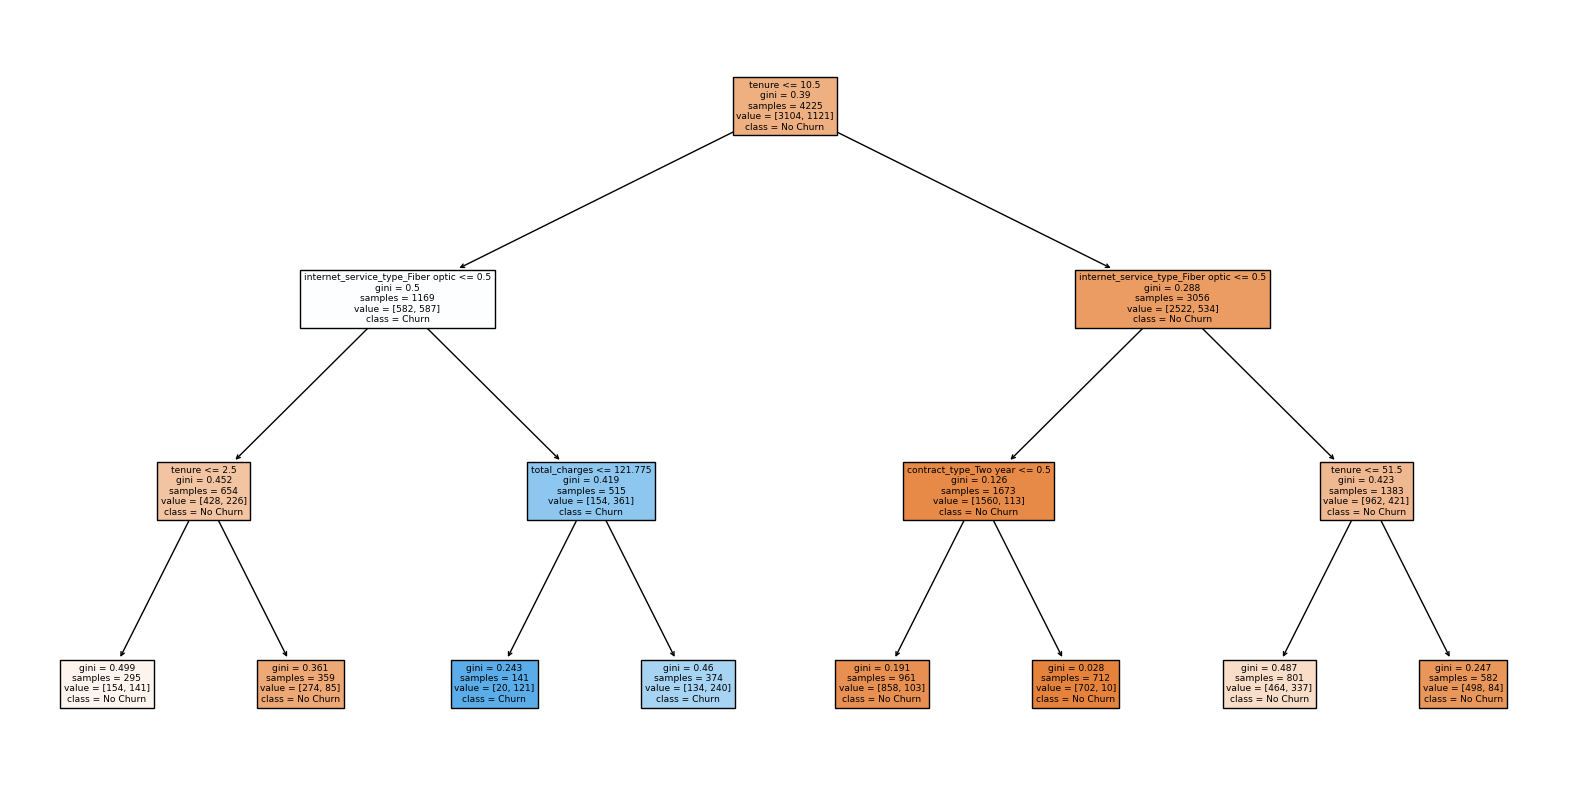

In [171]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["No Churn", "Churn"]) #filled=True means to fill the box with colors
plt.show()

> ## 7.2 Random Forest
>> ### the model with 700 trees of depth 4 has high accuracy and little model variances,therefore chosen as the best model.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Define hyperparameters
ntrees = (100,300,500,700,900,1100)
depth = (2,3,4,5,6,7,8,9,10)

# Initialize an empty list to store results
results = []

# Loop over different hyperparameter values
for n in ntrees:
    for i in depth:
        # Create a random forest model with the current hyperparameter values
        rf = RandomForestClassifier(n_estimators=n, max_depth=i, random_state=123)

        # Fit the model on the training data
        rf.fit(X_train, y_train)

        # Get the accuracy score
        score_train = rf.score(X_train, y_train)
        score_val = rf.score(X_val, y_val)

        # Append the results to the list
        results.append({'Number of Trees': n,
                        'Max Depth': i,
                        'Train Accuracy': round(score_train, 4),
                        'Validate Accuracy': round(score_val, 4),
                        'Difference': abs(score_train - score_val)})

# Convert the list of dictionaries to a DataFrame
random_forest_accuracy = pd.DataFrame(results)

print(random_forest_accuracy.sort_values(by=['Difference', 'Validate Accuracy'], ascending=[True, False]))


    Number of Trees  Max Depth  Train Accuracy  Validate Accuracy  Difference
2               100          4          0.7950             0.7949    0.000140
20              500          4          0.7969             0.7977    0.000806
38              900          4          0.7962             0.7984    0.002226
47             1100          4          0.7967             0.7991    0.002462
29              700          4          0.7969             0.7999    0.002935
11              300          4          0.7960             0.7921    0.003925
39              900          5          0.8021             0.7977    0.004401
30              700          5          0.8031             0.7984    0.004638
3               100          5          0.8019             0.7970    0.004874
48             1100          5          0.8033             0.7984    0.004875
10              300          3          0.7858             0.7807    0.005103
46             1100          3          0.7872             0.782

In [57]:
best_random_forest = random_forest_accuracy.iloc[29,:]


> # 7.3 K-Nearest Neighbor
>> ## The model with uniform weights and 16 neighbors is chosen to be the best knn model due to its high accuracy and low model variances

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Initialize an empty list to store results
results = []

# Loop over different hyperparameter values
for neighbors in range(1, 21):
       for weights in ['uniform', 'distance'] :
            
    # Create a decision tree model with the current hyperparameter value
        knn = KNeighborsClassifier(n_neighbors=neighbors,weights=weights)

    # Fit the model on the training data
        knn.fit(X_train, y_train)
    
    # Get the accuracy score
        score_train = knn.score(X_train, y_train)
        score_val = knn.score(X_val, y_val)

    # Append the results to the list
        results.append({'Weights': weights, 
                    'Number of Neighbors': neighbors,
                    'Train_Accuracy': round(score_train, 4),
                    'Validate_Accuracy': round(score_val,4),
                   'Difference':abs(score_train - score_val) })

# Convert the list of dictionaries to a DataFrame
knn_accuracy = pd.DataFrame(results)

print(knn_accuracy.sort_values(by=['Difference','Validate_Accuracy'],ascending=[True,False]))



     Weights  Number of Neighbors  Train_Accuracy  Validate_Accuracy  \
38   uniform                   20          0.7983             0.7857   
30   uniform                   16          0.8036             0.7906   
34   uniform                   18          0.8007             0.7871   
32   uniform                   17          0.8066             0.7913   
24   uniform                   13          0.8038             0.7878   
36   uniform                   19          0.8043             0.7878   
26   uniform                   14          0.8059             0.7871   
28   uniform                   15          0.8066             0.7857   
22   uniform                   12          0.8069             0.7850   
18   uniform                   10          0.8076             0.7850   
20   uniform                   11          0.8104             0.7821   
16   uniform                    9          0.8156             0.7814   
14   uniform                    8          0.8151             0.

In [77]:
best_knn = knn_accuracy.iloc[30,:]
best_knn

Weights                 uniform
Number of Neighbors          16
Train_Accuracy           0.8036
Validate_Accuracy        0.7906
Difference             0.012919
Name: 30, dtype: object

In [78]:
print(best_decision_tree)
print()
print(best_random_forest)
print()
print(best_knn)

Max Depth            3.000000
Train_Accuracy       0.783700
Validate_Accuracy    0.787800
Difference           0.004124
Name: 2, dtype: float64

Number of Trees      700.000000
Max Depth              4.000000
Train Accuracy         0.796900
Validate Accuracy      0.799900
Difference             0.002935
Name: 29, dtype: float64

Weights                 uniform
Number of Neighbors          16
Train_Accuracy           0.8036
Validate_Accuracy        0.7906
Difference             0.012919
Name: 30, dtype: object


> ## Conclusion
> > ## Random Forest model with n_estimators = 700  and  max_depth = 4 is chosen to be the best mode

# 8. Model Testing <a name="testing"></a>

In [79]:
best_model_rf = RandomForestClassifier(n_estimators=700, max_depth=4)
best_model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=700)

In [83]:
# Training and Validate scores
print(best_model_rf.score(X_train,y_train))
print(best_model_rf.score(X_val,y_val))

0.7971597633136095
0.7970191625266146


In [81]:
# Test Score
best_model_rf.score(X_test, y_test)

0.7892122072391767

> ### 8.1 Visualization
> > ### From the visualization, we can infer that the model is more conservative compared to reality.

In [87]:
# The predicted values of test dataset with the best model
y_pred_test = best_model_rf.predict(X_test)

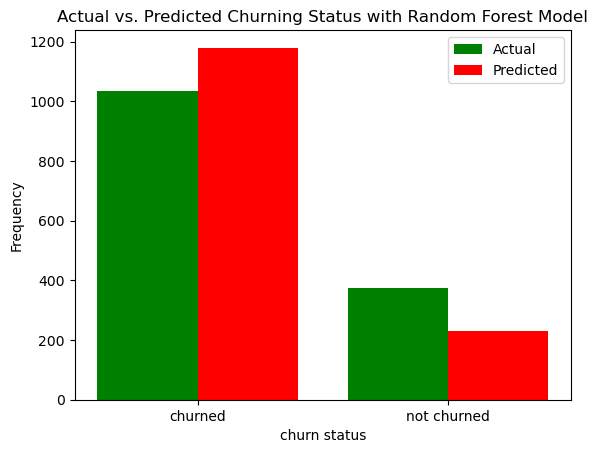

In [119]:
data = [y_test, y_pred_test]

# Create a histogram
plt.hist(data, bins=[-0.5, 0.5, 1.5], color=['green', 'red'], label=['Actual', 'Predicted'])

plt.xlabel('churn status')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Churning Status with Random Forest Model')
plt.xticks([0, 1], ['churned', 'not churned'])
plt.legend()
plt.show()

# 9. Conclusion <a name="conclusion"></a>
> ## Key findings:
> ### -
> ## Recommendations:
> ### -
> ## Next Steps:
> ### - To quantify how much each factor can affect churning status, with more advanced

# Download dataframes to csv files

In [202]:
# consolidate the actual y-values and predicted y-values to a pandas dataframe
df = pd.DataFrame ({ 'Actual':y_test,'Predicted':y_pred_test})
df

,Actual,Predicted
customer_id,,
6941-KXRRV,0,0
0206-OYVOC,0,0
7442-YGZFK,0,1
9018-PCIOK,0,0
1591-MQJTP,0,0
...,...,...
0378-CJKPV,0,0
3551-HUAZH,1,1
6322-PJJDJ,0,0


In [ ]:
# Download the dataframe to csv
df.to_csv('Telco prediction')

In [195]:
# Calculate the probability of each class, and write them in a pandas frame
probability = pd.DataFrame(best_model_rf.predict_proba(X_test))

In [ ]:
# Download the dataframe to csv
probability.to_csv('Prediction')

# References: 
    
TechSee Augmented Vision Ltd. (2022, December 31). Reasons for customer churn in Telecoms [Survey Results] | TechSee. TechSee. https://techsee.me/resources/reports/2019-telecom-churn-survey/#:~:text=Primary%20reasons%20for%20churn%20in%20telecoms&text=Customers%20canceled%20their%20contracts%20for,or%20had%20a%20negative%20approach)